In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

raw_data = pd.read_csv("iris_with_species.csv")

In [65]:
petal_or_sepal = "petal"

In [66]:
def scale_data(data):
    scaler = preprocessing.StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    return data_scaled

In [67]:
def screen_data(petal_sepal, data):
    if petal_sepal == "sepal":
        data_select = data.iloc[:, :-3]
        return data_select
    elif petal_sepal == "petal":
        data_select = data.iloc[:, 2:-1]
        return data_select

In [68]:
def scater_plot(data, value):
    x_values = f"{value}_length"
    y_values = f"{value}_width"
    x_label = f"Length of {value}"
    y_label = f"Width of {value}"

    if "clusters" in data.columns:
        plt.scatter(data[x_values], data[y_values], c=data["clusters"], cmap="rainbow")
    else:
        plt.scatter(data[x_values], data[y_values])
        
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

In [69]:
def elbow_method(clusters, data):
    wcss = list()
    for c in range(1, clusters+1):
        kmeans = KMeans(c)
        kmeans.fit(data)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    
    plt.plot(range(1, clusters+1), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')
    return plt.show()

In [70]:
def cluster_data(number_of_clusters, data):
    data_c = data.copy()
    kmeans = KMeans(number_of_clusters)
    kmeans.fit(data_c)
    data_c["clusters"] = kmeans.fit_predict(data_c)
    return data_c

In [71]:
data = screen_data(data=raw_data, petal_sepal=petal_or_sepal)

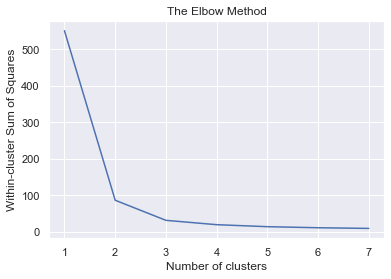

In [72]:
elbow_method(clusters=7, data=data)

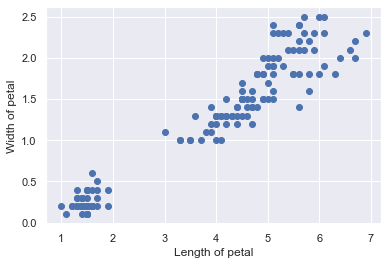

In [73]:
scater_plot(data=data, value=petal_or_sepal)

In [86]:
data_clusters = cluster_data(number_of_clusters=2, data=data)

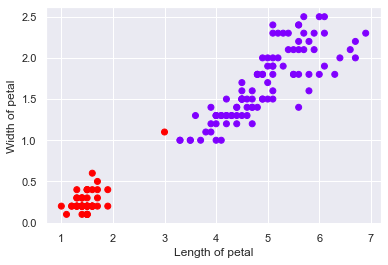

In [87]:
scater_plot(data=data_clusters, value=petal_or_sepal)